In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Raw Data Loading
df = pd.read_csv('./data/titanic/train.csv')
# display(df.head())
train = df

# 필요없는 column부터 제거
train.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1, inplace=True)

# 성별처리
sex_mapping = { 'male' : 0, 'female' : 1 }
train['Sex'] = train['Sex'].map(sex_mapping)

# 가족처리
train['Family'] = train['SibSp'] + train['Parch']
train.drop(['SibSp','Parch'], axis=1, inplace=True)

# Embarked 결측치 처리
train['Embarked'] = train['Embarked'].fillna('Q')

# Age에 대한 결측치 처리
train['Age'] = train['Age'].fillna(train['Age'].mean())

# Embarked 문자 -> 숫자 처리
embarked_mapping = { 'S' : 0, 'C' : 1, 'Q' : 2 }
train['Embarked'] = train['Embarked'].map(embarked_mapping)

# Age에 대해서 Binning 처리(Numerical value -> categorical value)
train.loc[train['Age'] < 8, 'Age'] = 0
train.loc[(train['Age'] >= 8) & (train['Age'] < 20), 'Age'] = 1
train.loc[(train['Age'] >= 20) & (train['Age'] < 65), 'Age'] = 2
train.loc[train['Age'] >= 65, 'Age'] = 3

# display(train.head())

# 데이터가 준비되었다.
# 7:3 비율로 데이터를 나누어서 학습과 정확도 측정에 사용한다.
train_data = train.iloc[:int(train.shape[0] * 0.7)]
test_data = train.iloc[int(train.shape[0] * 0.7):]

train_x_data = train_data.drop('Survived', axis=1, inplace=False).values
train_t_data = train_data['Survived'].values.reshape(-1,1)

test_x_data = test_data.drop('Survived', axis=1, inplace=False).values
test_t_data = test_data['Survived'].values.reshape(-1,1)


####
# 테스트용 파일
test = pd.read_csv('./data/titanic/test.csv')
PassengerId = pd.DataFrame(test['PassengerId'])

test.drop(['PassengerId','Name','Ticket','Fare','Cabin'], axis=1, inplace=True)

test['Sex'] = test['Sex'].map(sex_mapping)

test['Family'] = test['SibSp'] + test['Parch']
test.drop(['SibSp','Parch'], axis=1, inplace=True)

test['Embarked'] = test['Embarked'].fillna('Q')

test['Age'] = test['Age'].fillna(test['Age'].mean())

test['Embarked'] = test['Embarked'].map(embarked_mapping)

test.loc[test['Age'] < 8, 'Age'] = 0
test.loc[(test['Age'] >= 8) & (test['Age'] < 20), 'Age'] = 1
test.loc[(test['Age'] >= 20) & (test['Age'] < 65), 'Age'] = 2
test.loc[test['Age'] >= 65, 'Age'] = 3

test_x = test
test_y = pd.read_csv('./data/titanic/gender_submission.csv')
df = pd.DataFrame(test_y['Survived'])
df.colums = ['Survived']
test_y = df

display(test.head())
display(test_y.head())

C:\Users\j828h\anaconda3\envs\data_env\lib\site-packages\ipykernel_launcher.py:77: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,Pclass,Sex,Age,Embarked,Family
0,3,0,2.0,2,0
1,3,1,2.0,0,1
2,2,0,2.0,2,0
3,3,0,2.0,0,0
4,3,1,2.0,0,2


,Survived
0,0
1,1
2,0
3,0
4,1


In [47]:
# placeholder
X = tf.placeholder(shape=[None,5], dtype=tf.float32)  # 독립변수의 데이터를 받기위한 placeholder
T = tf.placeholder(shape=[None,1], dtype=tf.float32)  # 종속변수(label)의 데이터를 받기위한 placeholder

# Weight & bias
W = tf.Variable(tf.random.normal([5,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(loss)

# 정확도(Accuracy)측정
predict = tf.cast(H >= 0.5, dtype=tf.float32)  # True -> 1.0, False -> 0
correct = tf.equal(predict,T)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(300000):
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss], 
                                         feed_dict={X:train_x_data, T:train_t_data})
    
    if step % 30000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W_val, b_val, loss_val))

W : [[-1.0045999 ]
 [ 1.5626273 ]
 [ 0.60587287]
 [-0.5780557 ]
 [ 0.05007101]], b : [-1.8765544], loss : 0.9094290137290955
W : [[-0.84200746]
 [ 1.6167008 ]
 [ 0.7254507 ]
 [-0.53393584]
 [ 0.11838508]], b : [-1.800885], loss : 0.7213600277900696
W : [[-0.724813  ]
 [ 1.6574707 ]
 [ 0.8048655 ]
 [-0.49639207]
 [ 0.15864539]], b : [-1.7467232], loss : 0.6278071403503418
W : [[-0.64788544]
 [ 1.6882122 ]
 [ 0.8509533 ]
 [-0.46500185]
 [ 0.17643397]], b : [-1.7106683], loss : 0.5884509682655334
W : [[-0.5995935 ]
 [ 1.7119604 ]
 [ 0.8741583 ]
 [-0.43824452]
 [ 0.18026309]], b : [-1.68688], loss : 0.5723593831062317
W : [[-0.5694127 ]
 [ 1.732113  ]
 [ 0.8831883 ]
 [-0.41467994]
 [ 0.17654303]], b : [-1.6709173], loss : 0.5648408532142639
W : [[-0.55007154]
 [ 1.7499944 ]
 [ 0.88385844]
 [-0.39325503]
 [ 0.16916214]], b : [-1.6594933], loss : 0.5603445768356323
W : [[-0.5371553 ]
 [ 1.7670833 ]
 [ 0.8796838 ]
 [-0.37326753]
 [ 0.16033934]], b : [-1.6508223], loss : 0.5569320917129517
W :

In [48]:
print('-----------------------------')
print('train_data = ', len(train_x_data), 'test_data = ', len(test_x))
 
# test용 파일 예측
h, predict_result, y, a = sess.run([H, predict, T, accuracy], feed_dict={X:test_x, T:test_y})
print('\n Predicted: ',predict_result, '\nCorrect (Y): ', y, '\nAccuracy: ', a)

-----------------------------
train_data =  623 test_data =  418

 Predicted:  [[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1

In [58]:
# 입력 조건에 맞게 1차원으로 형 변환
predict_result = predict_result.ravel()
print(predict_result.shape) # (418,)
# float32 data type을 int32형으로 변환 (변환 안할 시 score 0로 채점됨)
predict_result = predict_result.astype('int32')

# 제출 파일
submission = pd.DataFrame({
        "PassengerId": PassengerId['PassengerId'],
        "Survived": predict_result
})

submission.to_csv('./data/titanic/submission2.csv', index=False)

In [59]:
df = pd.read_csv('./data/titanic/submission2.csv')
display(df)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


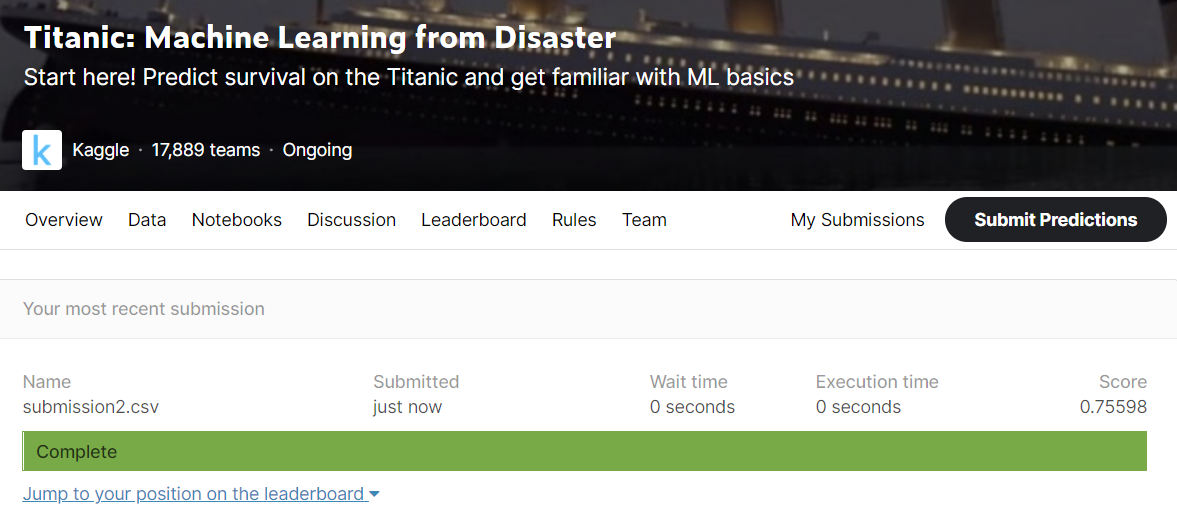